## Evaluation of recommender system algorithms in tourism

## Calculation of iterations in cross-validation
---

In [1]:
# For better precision on tests
import random
import numpy as np

# For plots some results
import matplotlib.pyplot as plt
## print(plt.style.available)
plt.style.use('tableau-colorblind10') #seaborn-talk, fivethirtyeight
%matplotlib inline

from surprise import Reader, Dataset, KNNBasic, KNNWithMeans, SVD, SVDpp, CoClustering, SlopeOne
from surprise.model_selection import cross_validate

In [2]:
random.seed(0)
np.random.seed(0)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5))
data = Dataset.load_from_file('tourism.csv', reader=reader)

#### kNN Basic with Cosine Similarity

In [3]:
sim_options = {'name': 'cosine',
               'user_based': True}

algorithm = KNNBasic(k=40, min_k=3, sim_options=sim_options)

kNNBasicCosine = cross_validate(algorithm, data, measures=['RMSE'], cv=5)
print(kNNBasicCosine)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.87668529, 0.88197361, 0.86122794, 0.86805328, 0.84208085]), 'fit_time': (2.575563430786133, 2.9147753715515137, 2.726919174194336, 2.4931907653808594, 2.437941312789917), 'test_time': (0.8212623596191406, 0.8127315044403076, 0.6775562763214111, 0.6535718441009521, 0.6505720615386963)}


#### kNN Basic with Pearson Similarity

In [4]:
sim_options = {'name': 'pearson',
               'user_based': True}

algorithm = KNNBasic(k=40, min_k=3, sim_options=sim_options)

kNNBasicPearson = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


#### kNN Means with Cosine Similarity

In [5]:
sim_options = {'name': 'cosine','user_based': True}

algorithm = KNNWithMeans(k=40, min_k=3, sim_options=sim_options)

kNNMeansCosine = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


#### kNN Means with Pearson Similarity

In [6]:
sim_options = {'name': 'pearson',
               'user_based': True}

algorithm = KNNWithMeans(k=40, min_k=3, sim_options=sim_options)

kNNMeansPearson = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


#### SVD

In [7]:
algorithm = SVD(n_factors=20, n_epochs=20, lr_all=0.005, reg_all=0.02)

svd = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

#### SVDpp

In [8]:
algorithm = SVDpp(n_factors=20, n_epochs=20, lr_all=0.005, reg_all=0.02)

svdpp = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

#### Co-Clustering

In [9]:
algorithm = CoClustering(n_cltr_u=3, n_cltr_i=3, n_epochs=20)

coclustering = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

#### SlopeOne

In [10]:
algorithm = SlopeOne()

slopeone = cross_validate(algorithm, data, measures=['RMSE'], cv=5)

## Example of k-Fold Cross-Validate
---

#### With Algorithm SVD

Text(0.5,1,'Mean per Iteration')

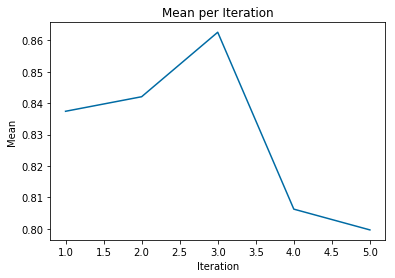

In [11]:
k_folds = range(1, 6)
svd_k_folds = svd['test_rmse']

plt.plot(k_folds, svd_k_folds)
plt.xlabel('Iteration')
plt.ylabel('Mean')
plt.title('Mean per Iteration')

#### With Co-Clustering Algorithm

Text(0.5,1,'Mean per Iteration')

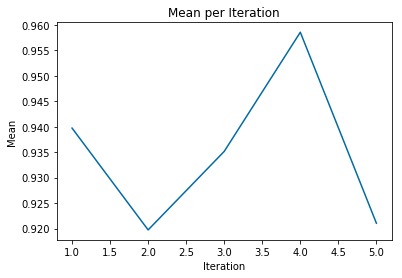

In [12]:
k_folds = range(1, 6)
coclustering_k_folds = coclustering['test_rmse']

plt.plot(k_folds, coclustering_k_folds)
plt.xlabel('Iteration')
plt.ylabel('Mean')
plt.title('Mean per Iteration')

## Calculate final means of algorithms
---

In [13]:
score_kNNBasicCosine = 0
for mean in kNNBasicCosine['test_rmse']:
    score_kNNBasicCosine = score_kNNBasicCosine + mean

score_kNNBasicCosine = score_kNNBasicCosine / len(kNNBasicCosine['test_rmse'])

In [14]:
score_kNNBasicPearson = 0
for mean in kNNBasicPearson['test_rmse']:
    score_kNNBasicPearson = score_kNNBasicPearson + mean

score_kNNBasicPearson = score_kNNBasicPearson / len(kNNBasicPearson['test_rmse'])

In [15]:
score_kNNMeansCosine = 0
for mean in kNNMeansCosine['test_rmse']:
    score_kNNMeansCosine = score_kNNMeansCosine + mean

score_kNNMeansCosine = score_kNNMeansCosine / len(kNNMeansCosine['test_rmse'])

In [16]:
score_kNNMeansPearson = 0
for mean in kNNMeansPearson['test_rmse']:
    score_kNNMeansPearson = score_kNNMeansPearson + mean

score_kNNMeansPearson = score_kNNMeansPearson / len(kNNBasicPearson['test_rmse'])

In [17]:
score_SVD = 0
for mean in svd['test_rmse']:
    score_SVD = score_SVD + mean

score_SVD = score_SVD / len(svd['test_rmse'])

In [18]:
score_SVDpp = 0
for mean in svdpp['test_rmse']:
    score_SVDpp = score_SVDpp + mean

score_SVDpp = score_SVDpp / len(svdpp['test_rmse'])

In [19]:
score_CoClustering = 0
for mean in coclustering['test_rmse']:
    score_CoClustering = score_CoClustering + mean

score_CoClustering = score_CoClustering / len(coclustering['test_rmse'])

In [20]:
score_SlopeOne = 0
for mean in slopeone['test_rmse']:
    score_SlopeOne = score_SlopeOne + mean

score_SlopeOne = score_SlopeOne / len(slopeone['test_rmse'])

## Ploting the results
---

In [21]:
scores = [score_kNNBasicCosine, score_kNNBasicPearson, score_kNNMeansCosine, 
          score_kNNMeansPearson, score_SVD, score_SVDpp,
          score_CoClustering, score_SlopeOne]

algorithms = ['kNN Basic - Cosine', 'kNN Basic - Pearson', 'kNN Means - Cosine', 'kNN Means - Pearson',
              'SVD', 'SDVpp', 'Co-Clustering', 'Slope One']

algorithms_index = np.arange(len(algorithms))

[0 1 2 3 4 5 6 7]
8


Text(0.5,1,'Comparison of prediction algorithms')

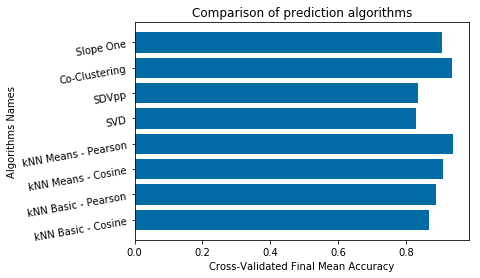

In [22]:
# plot the algorithms (x-axis) versus the cross-validated accuracy (y-axis)
plt.barh(algorithms_index, scores)
plt.ylabel('Algorithms Names')
plt.xlabel('Cross-Validated Final Mean Accuracy')
plt.yticks(algorithms_index, algorithms, rotation=10)
plt.title('Comparison of prediction algorithms')